In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,  OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import tensorflow as tf
import warnings
warnings.filterwarnings('ignore')

In [27]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data"
columns = ['Sex', 'Length', 'Diameter', 'Height', 'WholeWeight',
           'ShuckedWeight', 'VisceraWeight', 'ShellWeight', 'Rings']

df = pd.read_csv(url, names=columns)
print(df.shape)

(4177, 9)


In [28]:
df.head() #Displays first few rows of the dataset
df.info() # Provides a summary of the DataFrame, showing the data types and non-null counts.
df.describe() #Generates descriptive statistics for the numerical columns in the dataset.
df.isnull().sum() #Checks if there are any missing values in the dataset.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Sex            4177 non-null   object 
 1   Length         4177 non-null   float64
 2   Diameter       4177 non-null   float64
 3   Height         4177 non-null   float64
 4   WholeWeight    4177 non-null   float64
 5   ShuckedWeight  4177 non-null   float64
 6   VisceraWeight  4177 non-null   float64
 7   ShellWeight    4177 non-null   float64
 8   Rings          4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


Sex              0
Length           0
Diameter         0
Height           0
WholeWeight      0
ShuckedWeight    0
VisceraWeight    0
ShellWeight      0
Rings            0
dtype: int64

In [29]:
df['Age'] = df['Rings'] + 1.5 #adds new column age


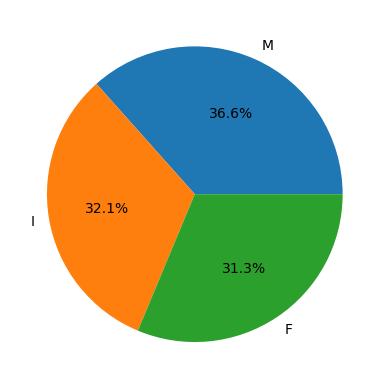

In [30]:
#Creates a pie chart to visualize the distribution of values in the 'Sex' column, showing the percentage representation of each category.
x = df['Sex'].value_counts() #Counts the number of occurrences for each unique value in the 'Sex' column.
labels = x.index
values = x.values
plt.pie(values,
        labels=labels,
        autopct='%1.1f%%')
plt.show()

In [31]:
#InterestingObservations
df.groupby('Sex').mean()

,Length,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings,Age
Sex,,,,,,,,,
F,0.579093,0.454732,0.158011,1.046532,0.446188,0.230689,0.302010,11.129304,12.629304
I,0.427746,0.326494,0.107996,0.431363,0.191035,0.092010,0.128182,7.890462,9.390462
M,0.561391,0.439287,0.151381,0.991459,0.432946,0.215545,0.281969,10.705497,12.205497


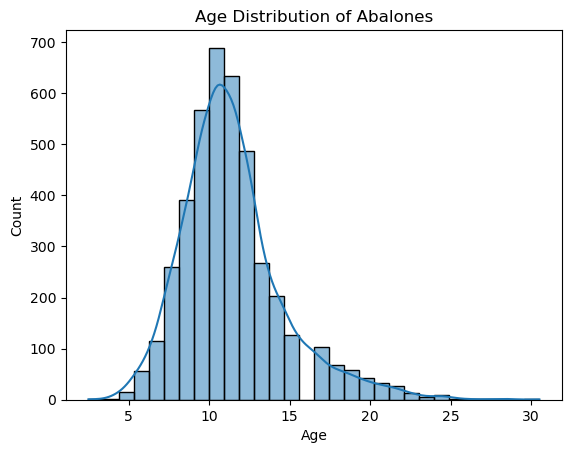

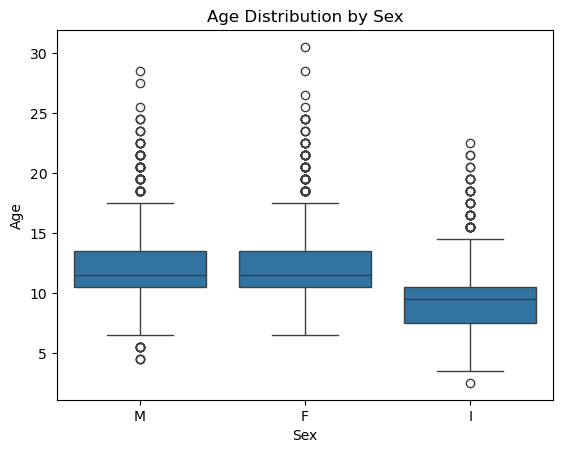

In [32]:
sns.histplot(df['Age'], bins=30, kde=True)
plt.title('Age Distribution of Abalones')
plt.show()

sns.boxplot(x='Sex', y='Age', data=df)
plt.title('Age Distribution by Sex')
plt.show()


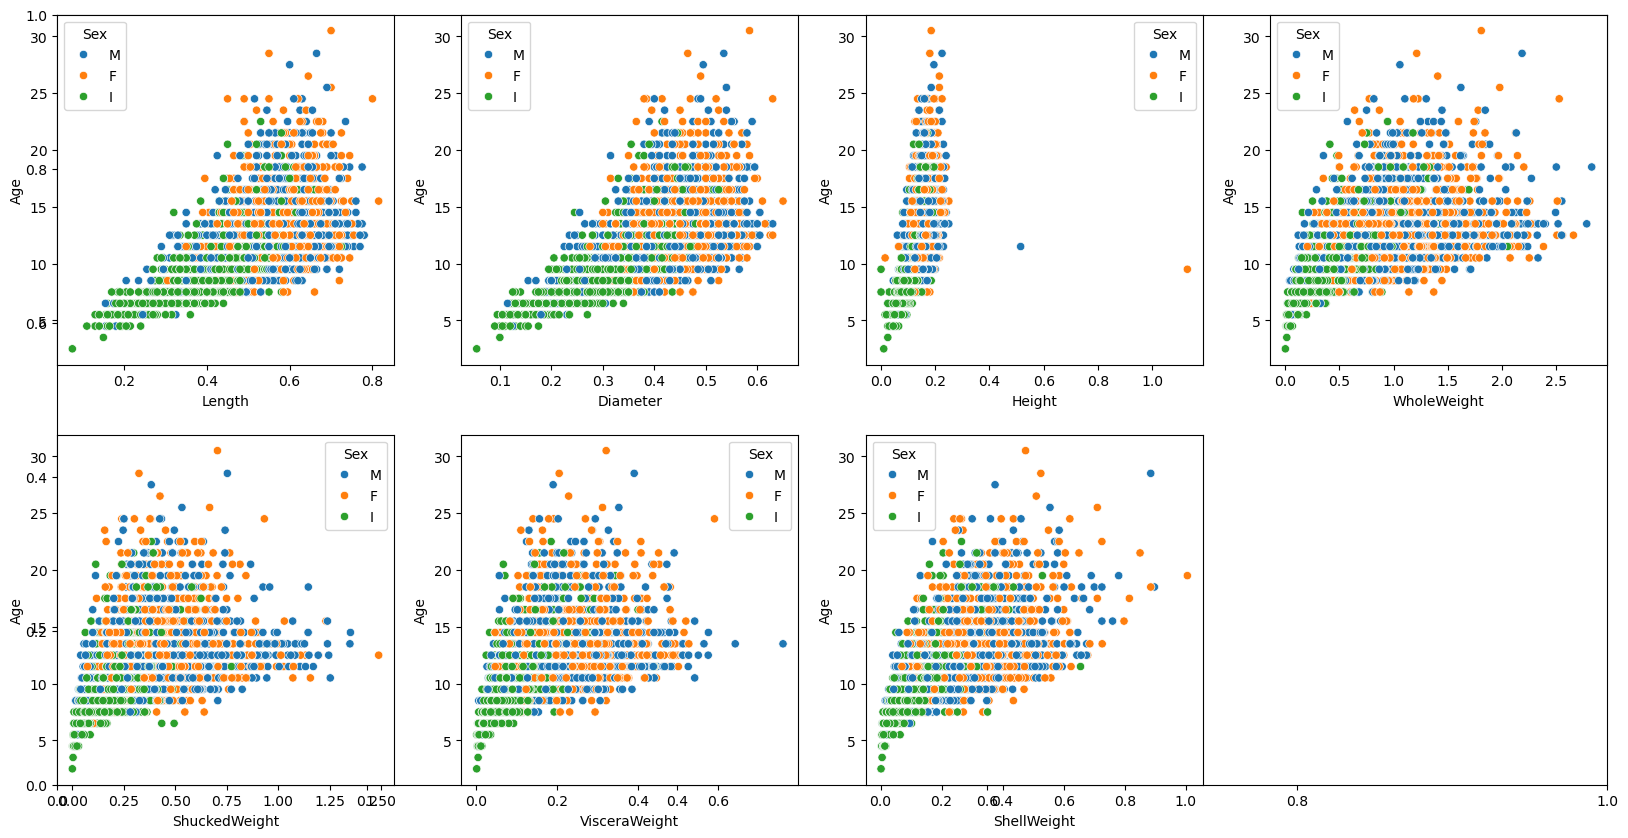

In [63]:
# Creates scatter plots to visualize the relationship between each feature and the target ('Age'), colored by the 'Sex' column
features = df.loc[:, 'Length':'ShellWeight'].columns #Defines the features (columns) to be plotted against the target variable 'Rings'

plt.subplots(figsize=(20, 10))
for i, feat in enumerate(features):
    plt.subplot(2, 4, i+1)
    sns.scatterplot(data=df, x=feat, y='Age', hue='Sex')

plt.show()

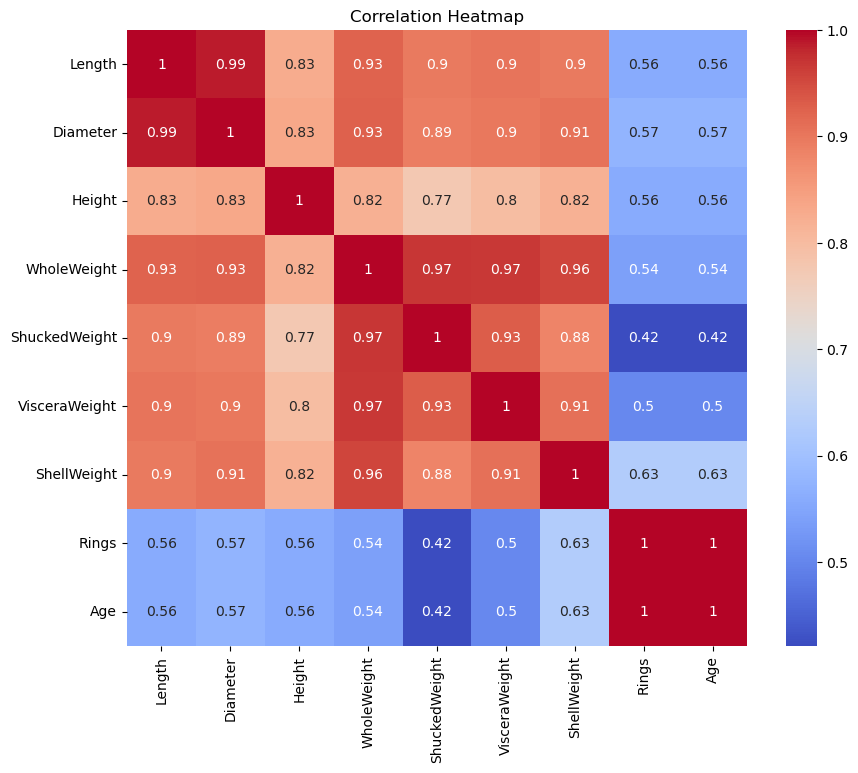

In [34]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.drop(['Sex'], axis=1).corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


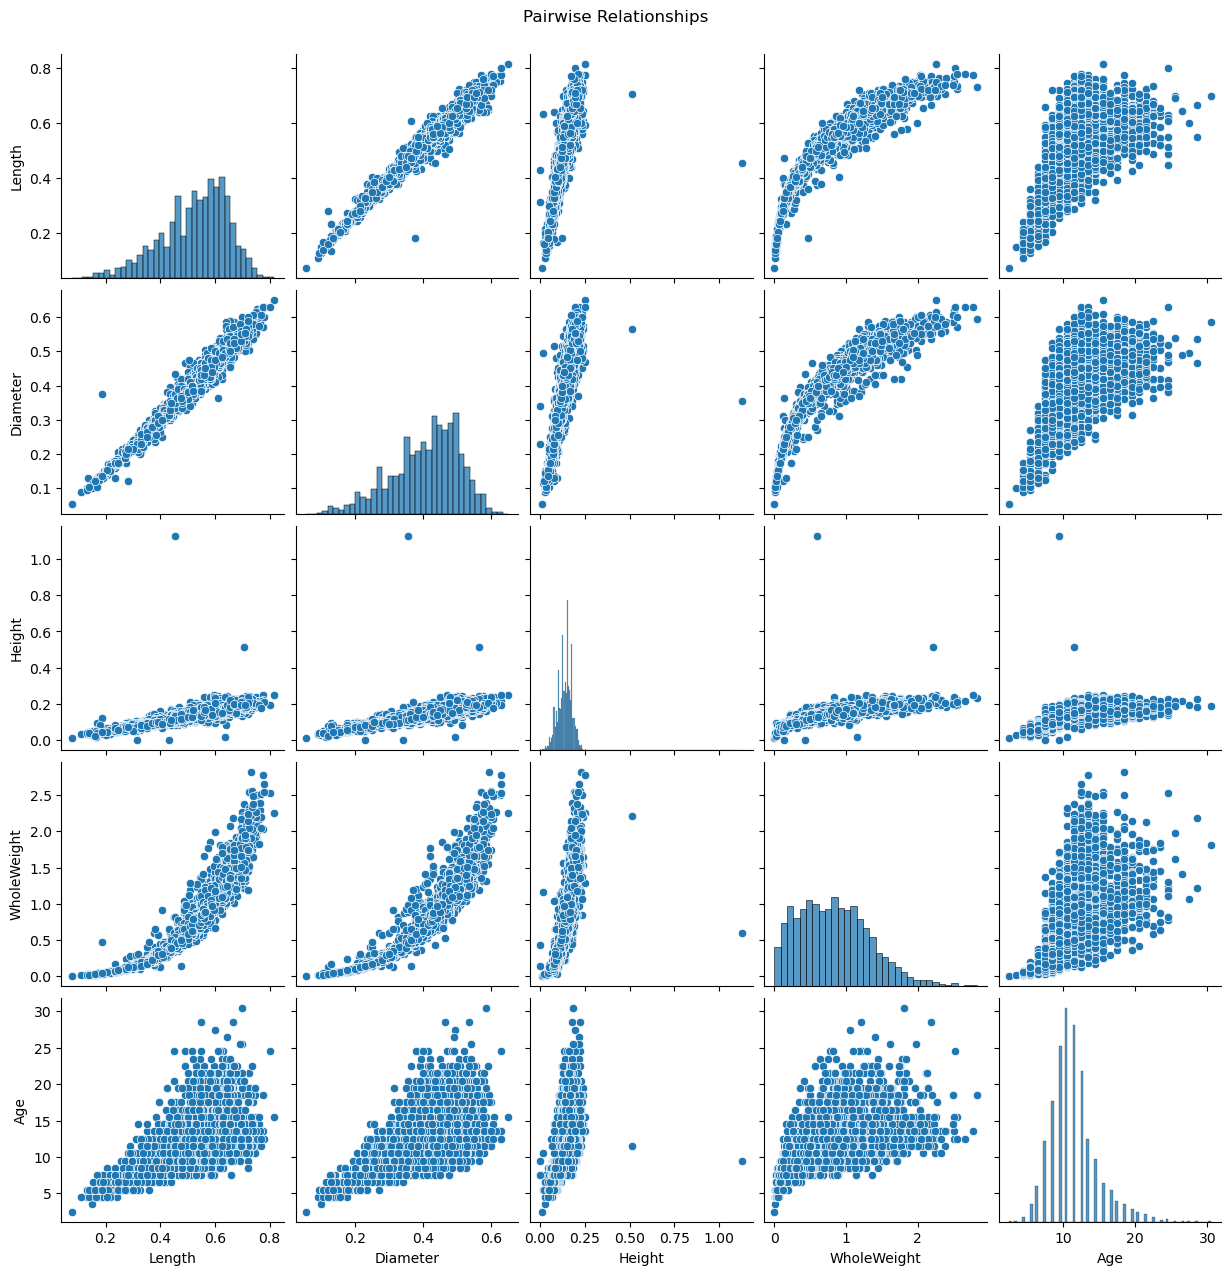

In [35]:
sns.pairplot(df[['Length', 'Diameter', 'Height', 'WholeWeight', 'Age']])
plt.suptitle('Pairwise Relationships', y=1.02)
plt.show()


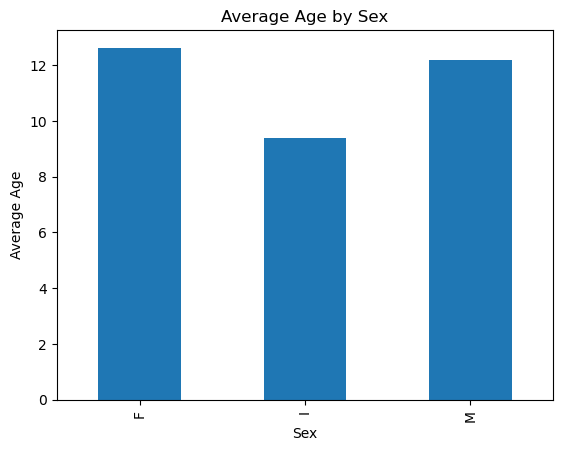

In [36]:
df.groupby('Sex')['Age'].mean().plot(kind='bar', title='Average Age by Sex')
plt.ylabel('Average Age')
plt.show()


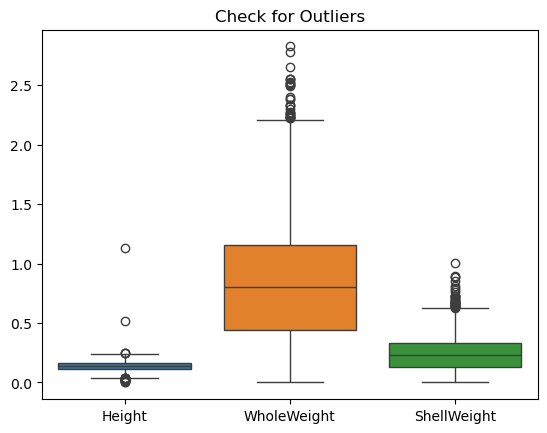

In [37]:
sns.boxplot(data=df[['Height', 'WholeWeight', 'ShellWeight']])
plt.title('Check for Outliers')
plt.show()


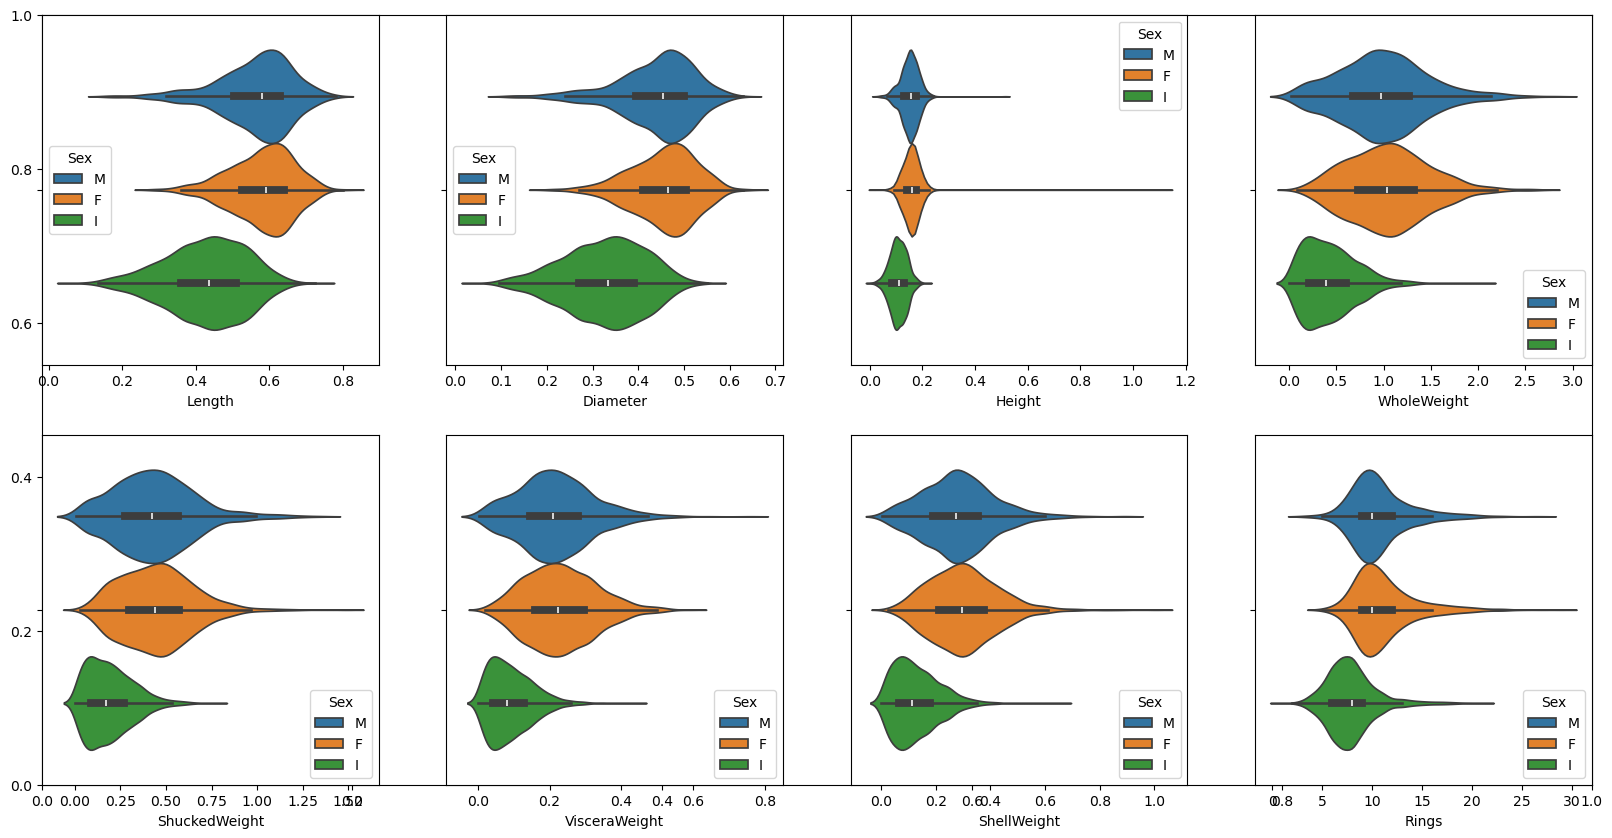

In [38]:
plt.subplots(figsize=(20, 10))
for i, feat in enumerate(features):
    plt.subplot(2, 4, i+1)
    sns.violinplot(data=df, x=feat, hue='Sex')

plt.subplot(2, 4, 8)
sns.violinplot(data=df, x='Rings', hue='Sex')
plt.show()

In [39]:
#Features and Target
features = df.drop(['Age'], axis=1)
target = df['Age']

In [45]:
# Define column types Pre-Processing
numeric_features = ['Length', 'Diameter', 'Height', 'WholeWeight',
                    'ShuckedWeight', 'VisceraWeight', 'ShellWeight', 'Rings']
categorical_features = ['Sex']

# Create a ColumnTransformer
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numeric_features),
    ('cat', OneHotEncoder(), categorical_features)
])


In [46]:
#Split data
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)
X_train.shape, X_test.shape

((3341, 9), (836, 9))

In [47]:
#Preprocess the data
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)


In [48]:
#Build preprocessing + model pipeline
def build_model(input_shape):
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(64, activation='relu', input_shape=(input_shape,)),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dense(1)  # Regression output
    ])
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    return model
    
#Build and train the model
model = build_model(X_train_processed.shape[1])


In [49]:
history = model.fit(
    X_train_processed,
    y_train,
    epochs=100,
    validation_split=0.1,
    verbose=1
)


Epoch 1/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 112.7172 - mae: 9.9555 - val_loss: 26.3407 - val_mae: 4.2507
Epoch 2/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 18.3700 - mae: 3.4463 - val_loss: 1.6844 - val_mae: 0.9749
Epoch 3/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.7629 - mae: 0.7932 - val_loss: 0.3589 - val_mae: 0.4417
Epoch 4/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.6619 - mae: 0.4743 - val_loss: 0.2432 - val_mae: 0.3634
Epoch 5/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3138 - mae: 0.3844 - val_loss: 0.1891 - val_mae: 0.3208
Epoch 6/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.2229 - mae: 0.3176 - val_loss: 0.1337 - val_mae: 0.2676
Epoch 7/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.2437 - mae: 0.2844 - val_loss: 0.0973 - val_mae: 0.2294
Epoch 8/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1260 - mae: 0.2329 - val_loss: 0.0718 - val_mae: 0.1953
Epoch 9/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0

In [50]:
#Evaluate
loss, mae = model.evaluate(X_test_processed, y_test)
print(f"Test Mean Absolute Error (MAE): {mae:.2f} years")


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 6.6796e-04 - mae: 0.0206
Test Mean Absolute Error (MAE): 0.02 years


In [51]:
#convert the training history to dataframe for analysis
hist_df=pd.DataFrame(history.history)
hist_df.head()

,loss,mae,val_loss,val_mae
0,82.384300,8.104909,26.340700,4.250673
1,11.383792,2.588266,1.684421,0.974865
2,1.142415,0.642989,0.358926,0.441710
3,0.618030,0.449185,0.243240,0.363420
4,0.409265,0.374788,0.189063,0.320842


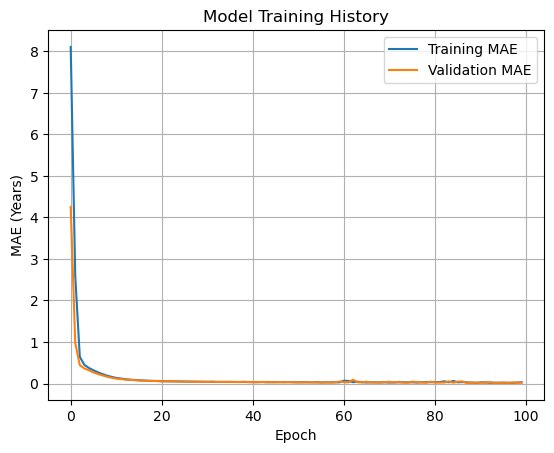

In [52]:
#Visualize Training History
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.xlabel('Epoch')
plt.ylabel('MAE (Years)')
plt.title('Model Training History')
plt.legend()
plt.grid(True)
plt.show()


In [53]:
#Predict example
example = X_test.iloc[0:1]
example_processed = preprocessor.transform(example)
predicted_age = model.predict(example_processed)
print(f"Predicted Age: {predicted_age[0][0]:.2f}, Actual Age: {y_test.iloc[0]:.2f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
Predicted Age: 10.47, Actual Age: 10.50
